<a href="https://colab.research.google.com/github/ritamsarkar2000/ML/blob/master/classify_clothes_images_practice_learned_from_tensorflow(dot)org_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#importing the required libraries

import tensorflow as tf
from tensorflow import keras

import numpy as np

import matplotlib.pyplot as plt

In [2]:
#loading the data and splitting for train and test 

fashion_mnist = keras.datasets.fashion_mnist
(train_images , train_labels) , (test_images , test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
#due to absence of class names in the dataset saving the class names

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [4]:
#data shape

print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


In [5]:
print(len(train_labels) ,",",  len(test_labels))

60000 , 10000


In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

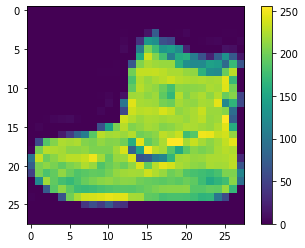

In [7]:
#plotting a image from the data set

plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.show()

In [0]:
#scale the values to 0 to 1

train_images = train_images / 255.0
test_images= test_images / 255.0

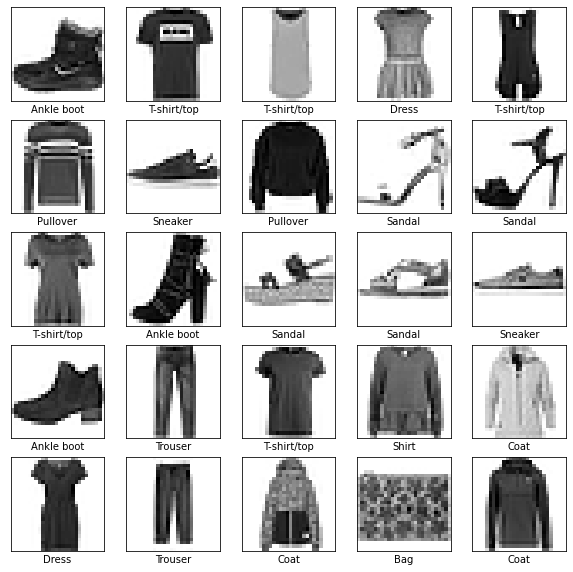

In [9]:
plt.figure(figsize=(10 ,10))
for i in range(25):
  plt.subplot(5 ,5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(train_images[i] , cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()  

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


<function matplotlib.pyplot.show>

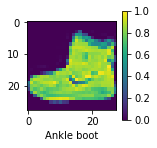

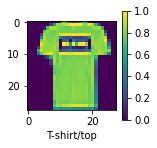

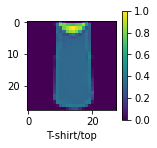

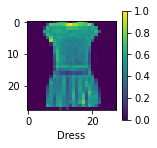

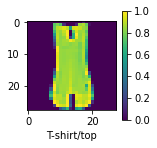

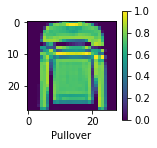

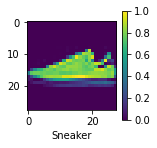

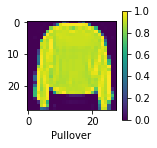

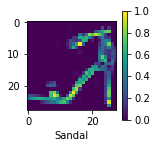

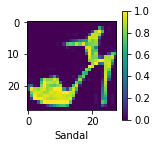

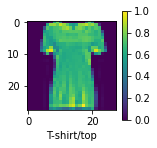

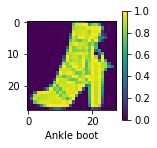

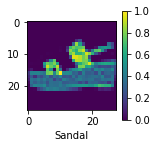

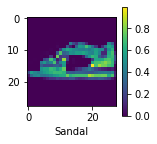

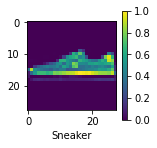

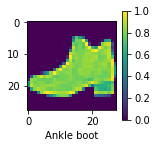

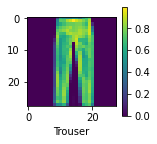

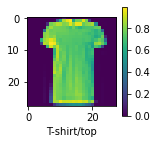

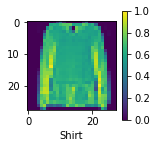

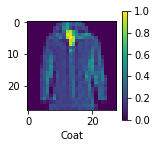

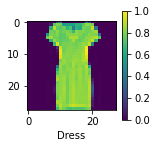

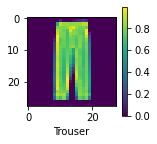

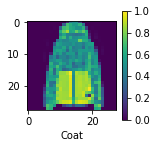

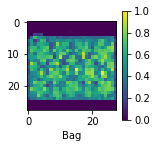

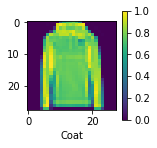

In [17]:
for i in range(25):
  plt.figure(figsize= (2,2))
  plt.imshow(train_images[i])
  plt.xlabel(class_names[train_labels[i]])
  plt.colorbar()
plt.show

In [0]:
#the model

model = tf.keras.Sequential([
    keras.layers.Flatten(input_shape=(28 ,28)),
    keras.layers.Dense(128, activation= 'relu'),
    keras.layers.Dense(10)
])

In [0]:
model.compile(optimizer= 'adam',
              loss= keras.losses.SparseCategoricalCrossentropy(from_logits= True),
              metrics=['accuracy'])

In [21]:
model.fit(train_images , train_labels, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4962 - accuracy: 0.8251
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3762 - accuracy: 0.8647
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3392 - accuracy: 0.8767
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3134 - accuracy: 0.8855
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2953 - accuracy: 0.8906
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2805 - accuracy: 0.8959
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2689 - accuracy: 0.9000
Epoch 8/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2573 - accuracy: 0.9037
Epoch 9/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2486 - accuracy: 0.9069
Epoch 10/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.239

In [22]:
test_loss, test_accuracy= model.evaluate(test_images , test_labels, verbose=2)
print("\n test accuracy=" ,test_accuracy)

313/313 - 0s - loss: 0.4123 - accuracy: 0.8770

 test accuracy= 0.8769999742507935


In [0]:
probability_model = tf.keras.Sequential([model,
                                        tf.keras.layers.Softmax()])

In [0]:
predictions= probability_model.predict(test_images)

In [25]:
np.argmax(predictions[0])

9

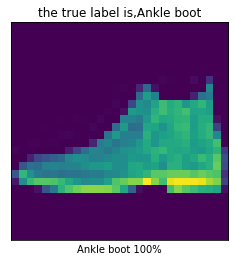

In [26]:
plt.figure()
plt.imshow(test_images[0])
plt.xticks([])
plt.yticks([])
plt.xlabel('{} {:2.0f}%'.format(class_names[np.argmax(predictions[0])],
                                   100*np.max(predictions[0])))
plt.title('{},{}'.format("the true label is",
                         class_names[test_labels[0]]))
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


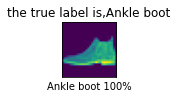

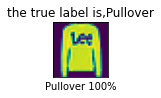

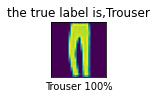

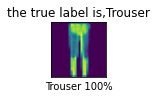

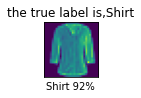

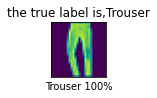

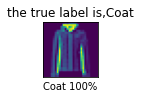

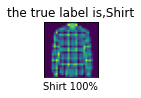

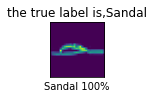

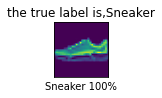

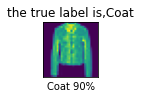

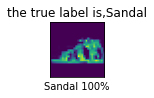

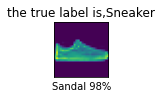

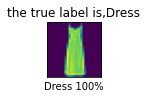

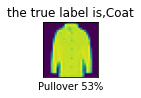

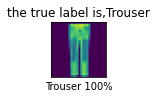

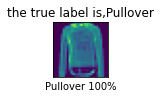

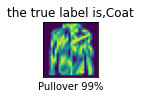

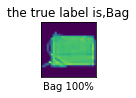

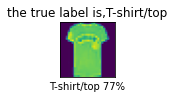

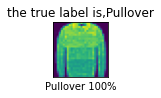

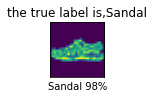

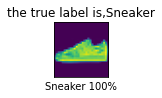

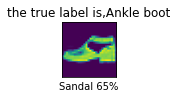

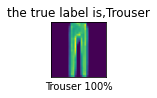

In [27]:
for i in range(25):
  plt.figure(figsize=(1,1))
  plt.imshow(test_images[i])
  plt.xticks([])
  plt.yticks([])
  plt.xlabel('{} {:2.0f}%'.format(class_names[np.argmax(predictions[i])],
                                   100*np.max(predictions[i])))
  plt.title('{},{}'.format("the true label is",
                         class_names[test_labels[i]]))
plt.show()


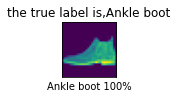

In [45]:
plt.figure(figsize=(1,1))
plt.imshow(test_images[0])
plt.xticks([])
plt.yticks([])
plt.xlabel('{} {:2.0f}%'.format(class_names[np.argmax(predictions[0])],
                                   100*np.max(predictions[0])))
plt.title('{},{}'.format("the true label is",
                         class_names[test_labels[0]]))
plt.show()

In [0]:
def prdc(i):
  plt.figure(figsize=(1,1))
  plt.imshow(test_images[i])
  plt.xticks([])
  plt.yticks([])
  plt.xlabel('{} {:2.0f}%'.format(class_names[np.argmax(predictions[i])],
                                   100*np.max(predictions[i])))
  plt.title('{},{}'.format("the true label is",
                         class_names[test_labels[i]]))
  plt.show()

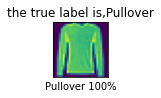

In [47]:
prdc(55)